In [ ]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=1500,
    dir='cartpole_ssm_only',
    device=device
    )

In [16]:
ssm_trainer.train()

Episode 1: Reward = 12.0
Episode 2: Reward = 10.0
Episode 3: Reward = 11.0
Episode 4: Reward = 16.0 | Validation Avg = 9.00 from 1 episodes 
Episode 5: Reward = 13.0
Episode 6: Reward = 18.0 | Validation Avg = 10.00 from 1 episodes 
Episode 7: Reward = 16.0 | Validation Avg = 9.00 from 1 episodes 
Episode 8: Reward = 14.0
Episode 9: Reward = 15.0 | Validation Avg = 8.00 from 1 episodes 
Episode 10: Reward = 13.0
Episode 11: Reward = 12.0
Episode 12: Reward = 14.0
Episode 13: Reward = 29.0 | Validation Avg = 9.00 from 1 episodes 
Episode 14: Reward = 11.0
Episode 15: Reward = 11.0
Episode 16: Reward = 9.0
Episode 17: Reward = 11.0
Episode 18: Reward = 12.0
Episode 19: Reward = 11.0
Episode 20: Reward = 12.0
Episode 21: Reward = 9.0
Episode 22: Reward = 12.0
Episode 23: Reward = 18.0 | Validation Avg = 10.00 from 1 episodes 
Episode 24: Reward = 20.0 | Validation Avg = 10.00 from 1 episodes 
Episode 25: Reward = 16.0 | Validation Avg = 8.00 from 1 episodes 
Episode 26: Reward = 14.0
Epis

In [17]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 1500.0


In [18]:
df = ssm_trainer.compile_data()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.weight,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss
0,4.722631e-07,0.000008,0.000038,0.000020,0.009847,0.001100,0.015516,0.000341,0.000002,9.233495e-07,...,0.352157,0.241411,0.039906,0.035559,0.278801,0.105410,12,12.0,0.0,-2.402148
1,3.824404e-06,0.000064,0.000321,0.000173,0.054437,0.006951,0.123949,0.003808,0.000012,2.068906e-06,...,0.286684,0.217899,0.036212,0.027846,0.253091,0.079155,22,10.0,0.0,-0.306846
2,4.419950e-06,0.000074,0.000383,0.000203,0.052579,0.007930,0.109004,0.003391,0.000019,2.427678e-07,...,0.321969,0.235272,0.043438,0.034790,0.293296,0.097865,33,11.0,0.0,-0.679143
3,1.334446e-06,0.000022,0.000080,0.000043,0.014662,0.002003,0.033474,0.000548,0.000003,1.454797e-06,...,0.350734,0.235965,0.048895,0.039162,0.322922,0.111555,49,16.0,9.0,2.571516
4,2.430403e-06,0.000041,0.000192,0.000103,0.027744,0.005079,0.074652,0.000916,0.000010,2.387201e-06,...,0.353195,0.229128,0.047439,0.038432,0.314568,0.111290,62,13.0,9.0,1.073442


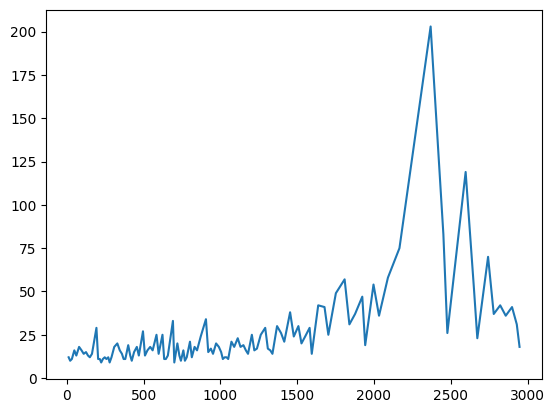

In [20]:
plt.plot(df['training_steps'],df['training_reward'])

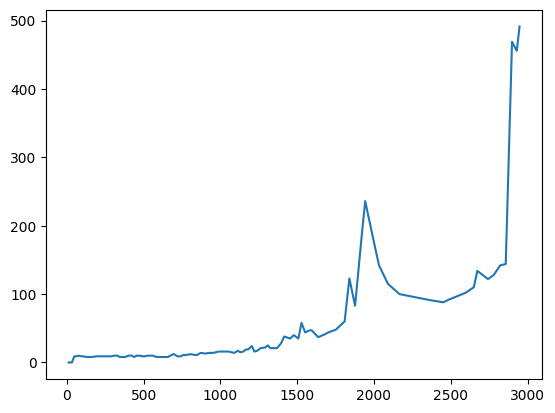

In [21]:
plt.plot(df['training_steps'],df['validation_reward'])